<a href="https://colab.research.google.com/github/kalyanram0542/mypython/blob/master/comparing_classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparing Classifiers for Building Classification Models

In [1]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2955 sha256=e26fa9f67f61e8bf67dfeaac093004324c4cccc22d5d43d96b4217a70ad49d4c
  Stored in directory: /root/.cache/pip/wheels/f8/e0/3d/9d0c2020c44a519b9f02ab4fa6d2a4a996c98d79ab2f569fa1
Successfully built sklearn


In [2]:
from sklearn.datasets import make_classification

In [3]:
X, Y= make_classification(n_samples=1000, n_classes=2, n_features=5, n_redundant=0, random_state=1)

In [4]:
X.shape

(1000, 5)

In [5]:
Y.shape

(1000,)

Data Split(80/20)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

In [8]:
x_train.shape, y_train.shape

((800, 5), (800,))

In [9]:
x_test.shape, y_test.shape

((200, 5), (200,))

Import modules

In [10]:
import pandas as pd

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier

In [11]:
names = ["Nearest_Neighbors", "Linear_SVM", "Polynomial_SVM", "RBF_SVM", "Gaussian_Process",
         "Gradient_Boosting", "Decision_Tree", "Extra_Trees", "Random_Forest", "Neural_Net", "AdaBoost",
         "Naive_Bayes", "QDA", "SGD"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(kernel="poly", degree=3, C=0.025),
    SVC(kernel="rbf", C=1, gamma=2),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
    DecisionTreeClassifier(max_depth=5),
    ExtraTreesClassifier(n_estimators=10, min_samples_split=2),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    SGDClassifier(loss="hinge", penalty="l2")]

Build Model, Apply Model on Test Data & Record Accuracy Scores

In [13]:
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(x_train, y_train)
    score = clf.score(x_test, y_test)
    scores.append(score)

In [14]:
scores

[0.82,
 0.82,
 0.74,
 0.82,
 0.84,
 0.83,
 0.835,
 0.835,
 0.835,
 0.835,
 0.845,
 0.83,
 0.84,
 0.825]

### Analysis of Model Performance

In [15]:
import pandas as pd
import seaborn as sns

In [16]:
df = pd.DataFrame()
df['name'] = names
df['score'] = scores
df

,name,score
0,Nearest_Neighbors,0.820
1,Linear_SVM,0.820
2,Polynomial_SVM,0.740
3,RBF_SVM,0.820
4,Gaussian_Process,0.840
5,Gradient_Boosting,0.830
6,Decision_Tree,0.835
7,Extra_Trees,0.835
8,Random_Forest,0.835
9,Neural_Net,0.835


Adding colors to the data frame

In [17]:
#https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html

cm = sns.light_palette("green", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

,name,score
0,Nearest_Neighbors,0.820000
1,Linear_SVM,0.820000
2,Polynomial_SVM,0.740000
3,RBF_SVM,0.820000
4,Gaussian_Process,0.840000
5,Gradient_Boosting,0.830000
6,Decision_Tree,0.835000
7,Extra_Trees,0.835000
8,Random_Forest,0.835000
9,Neural_Net,0.835000


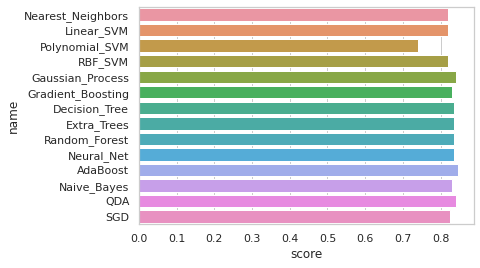

In [18]:
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=df)